In [1]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

In [2]:
i = misc.ascent()
print(i.shape)
print(i)

(512, 512)
[[ 83  83  83 ... 117 117 117]
 [ 82  82  83 ... 117 117 117]
 [ 80  81  83 ... 117 117 117]
 ...
 [178 178 178 ...  57  59  57]
 [178 178 178 ...  56  57  57]
 [178 178 178 ...  57  57  58]]


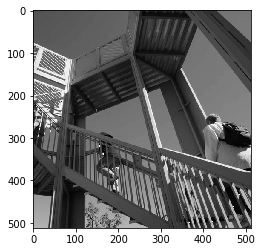

In [3]:
plt.imshow(i)
plt.gray()
plt.show()

In [4]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

In [5]:
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight
# lines.

# Experiment with different values for fun effects.
# filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
filters = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]
# filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to
# normalize them
weight = 1

In [6]:
for x in range(1, size_x-1):
  for y in range(1, size_y-1):
      convolution = 0.0
      convolution = convolution + (i[x - 1, y-1] * filters[0][0])
      convolution = convolution + (i[x, y-1] * filters[0][1])
      convolution = convolution + (i[x + 1, y-1] * filters[0][2])
      convolution = convolution + (i[x-1, y] * filters[1][0])
      convolution = convolution + (i[x, y] * filters[1][1])
      convolution = convolution + (i[x+1, y] * filters[1][2])
      convolution = convolution + (i[x-1, y+1] * filters[2][0])
      convolution = convolution + (i[x, y+1] * filters[2][1])
      convolution = convolution + (i[x+1, y+1] * filters[2][2])
      convolution = convolution * weight
      if convolution < 0:
        convolution = 0
      if convolution > 255:
        convolution = 255
      i_transformed[x, y] = convolution

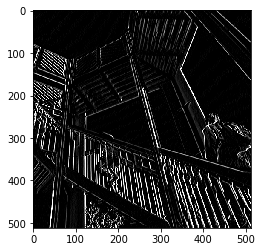

In [7]:
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
# plt.axis('off')
plt.show()   

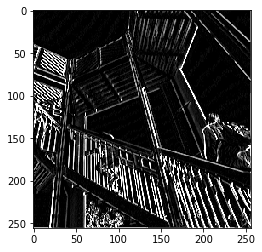

In [8]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = [
        i_transformed[x, y], 
        i_transformed[x + 1, y],
        i_transformed[x, y + 1], 
        i_transformed[x + 1, y + 1]
    ]
    pixels.sort(reverse=True)
    newImage[int(x/2), int(y/2)] = pixels[0]

# Plot the image. Note the size of the axes -- 
# now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
# plt.axis('off')
plt.show()      